## Zeitreihenvorhersage mit RNN / LSTN und Datenhaltung in SAP Hana Cloud

### SAP Hana Cloud Connection to Python

SAP Connection herstellen

Create configuration of SAP HANA Cloud Database

Create a json file called hana_cloud_config.json in current directory and write database details in that. Then save and close the file.

In [1]:
import json
sap_hana_config_file = "C:/Users/Gero/Desktop/SAP_HANA_ML/hana_cloud_config.json"

with open(sap_hana_config_file) as f:
    sap_hana_config = json.load(f)
    db_url  = sap_hana_config['url']
    db_port = sap_hana_config['port']
    db_user = sap_hana_config['user']
    db_pwd  = sap_hana_config['pwd']

Import the ConnnectionContext module

In [2]:
from hana_ml.dataframe import ConnectionContext

ConnectionContext includes methods for creating DataFrames from data on SAP HANA. DataFrames are tied to a ConnectionContext, and are unusable once their ConnectionContext is closed.

In [3]:
cc = ConnectionContext(db_url, db_port, db_user, db_pwd)
cc

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### CSV Daten in Pandas Dataframe laden

In [5]:
# Produktion von gefrorenen Desserts nicht Saisonbereinigt, Frequenz monatlich
# https://fred.stlouisfed.org/series/IPN31152N
df_data = pd.read_csv(
    'C:/Users/Gero/Desktop/SAP_HANA_ML/prediction/IPN31152N.csv', skipinitialspace=True, sep=',')

Python Machine Learning Client for SAP HANA (hana-ml)

This package enables Python data scientists to access SAP HANA data and build various machine learning models using the data directly in SAP HANA. This page provides an overview of hana-ml.

hana-ml uses SAP HANA Python driver (hdbcli) to connect to and access SAP HANA.

Python machine learning client for SAP HANA consists of two main parts:

1. SAP HANA DataFrame, which provides a set of methods for accessing and querying data in SAP HANA without bringing the data to the client.

2. A set of machine learning APIs for developing machine learning models.

Specifically, machine learning APIs are composed of two packages:

PAL package

PAL package consists of a set of Python algorithms and functions which provide access to machine learning capabilities in SAP HANA Predictive Analysis Library(PAL). SAP HANA PAL functions cover a variety of machine learning algorithms for training a model and then the trained model is used for scoring.

APL package

Automated Predictive Library (APL) package exposes the data mining capabilities of the Automated Analytics engine in SAP HANA through a set of functions. These functions develop a predictive modeling process that analysts can use to answer simple questions on their customer datasets stored in SAP HANA.

In [6]:
import hana_ml.dataframe as dataframe

In [8]:
# Pandas Dataframe wird als Tabelle nach SAP Hana geladen 
# df_remote ist ein hana_ml Dataframe und beinhaltet selbst keine Daten, verweist nur auf die Tabelle PREDICTION_DATA
# Ziel hana_ml Dataframe ist Daten, wann immer möglich in Hana zu belassen und Berechungen auf den Daten in SAP Hana durchzuführen

df_remote = dataframe.create_dataframe_from_pandas(
            connection_context=cc,
            pandas_df=df_data,
            table_name="PREDICTION_test_16_06_2023",
            force=True,
            drop_exist_tab=True,
            replace=False)

100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


### SAP HANA Explorer Tabelle PREDICTION_DATA wird angelegt

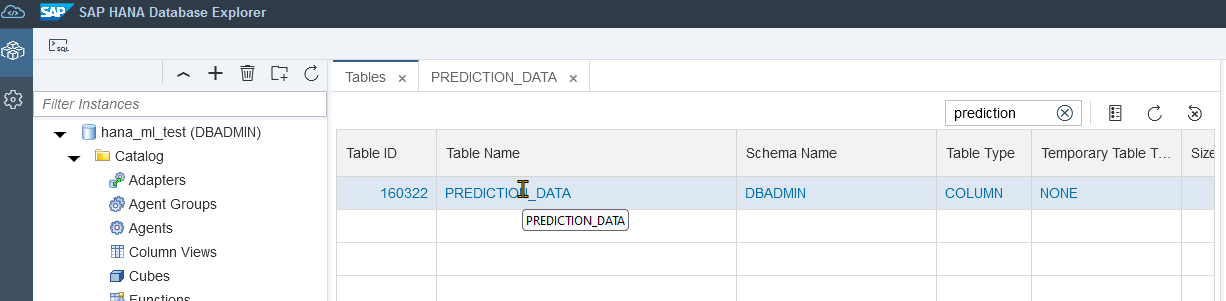

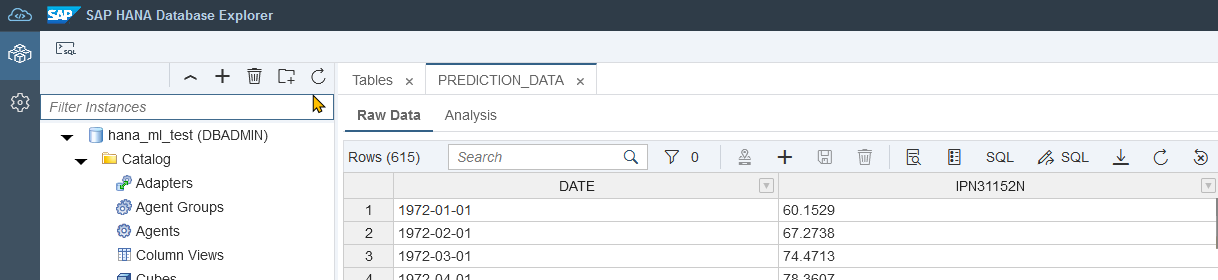

### Ausführung von SAP ML Funktionen aufgrund fehlenden ScripServer nicht 


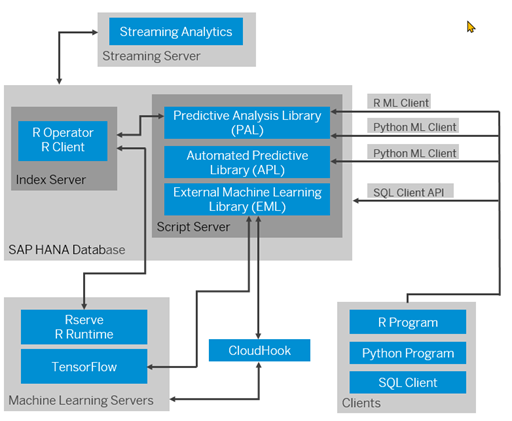
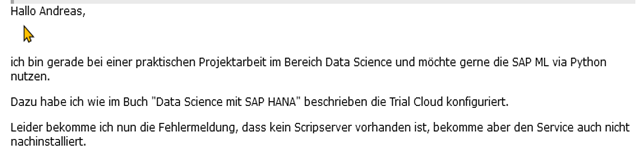
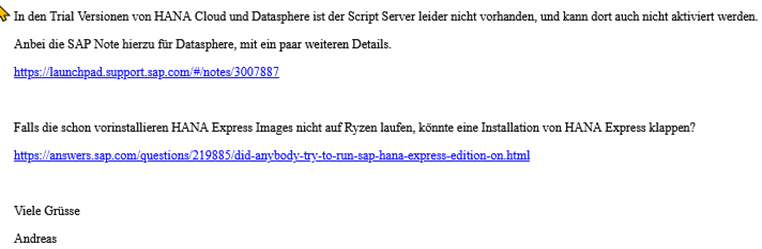




### Daten wieder aus der HANA Cloud laden und in Pandas Dataframe wandeln

## Vorgehensweise
https://towardsdatascience.com/the-googles-7-steps-of-machine-learning-in-practice-a-tensorflow-example-for-structured-data-96ccbb707d77

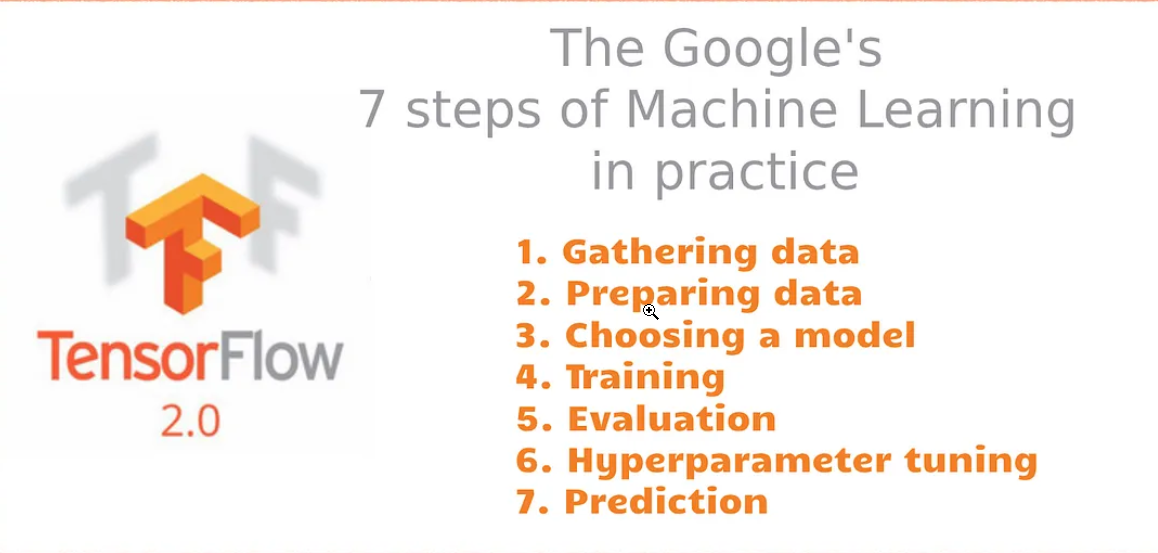

### Zugriff auf Daten in  SAP HANA Tabelle

In [801]:
hana_ml_df = cc.table('PREDICTION_Gero')
hana_ml_df

In [802]:
hana_ml_df.columns

['DATE', 'IPN31152N']

In [803]:
hana_ml_df.head(10).collect()

,DATE,IPN31152N
0,1972-01-01,60.1529
1,1972-02-01,67.2738
2,1972-03-01,74.4713
3,1972-04-01,78.3607
4,1972-05-01,85.0335
5,1972-06-01,100.9164
6,1972-07-01,100.4452
7,1972-08-01,96.6676
8,1972-09-01,86.0740
9,1972-10-01,70.6176


In [804]:
#from hana_ml.algorithms.pal import partition

#hana_ml_df_train, hana_ml_df_test, ana_ml_df_valid = partition.train_test_val_split(
#    data = hana_ml_df,
#    id_column = 'IPN31152N',
#    partition_method = 'stratified',
#    training_percentage = 0.6,
#    validation_percentage = 0.0,
#    testing_percentage = 0.4,
#    stratified_column = 'EXITED'
#    )

PALUnusableError: Missing needed role - PAL procedure execution needs role AFL__SYS_AFL_AFLPAL_EXECUTE or AFL__SYS_AFL_AFLPAL_EXECUTE_WITH_GRANT_OPTION

Fehlende Berechtigungen. Fehler konnte gefix werden.
Weitere Fehler allerdings: No Script Server available 
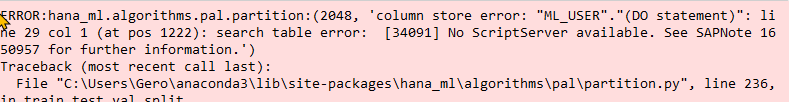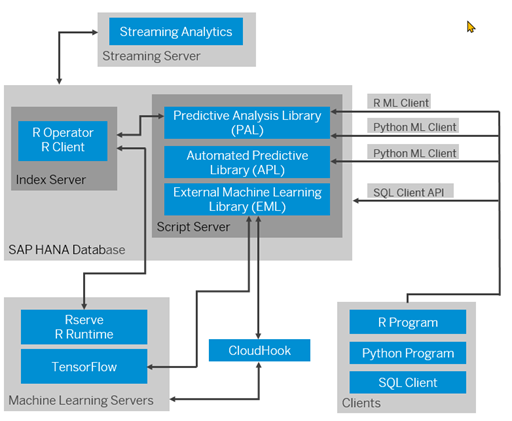

### SAP HANA DataFrame --> Pandas DataFrame
We need to transform a SAP HANA DataFrame to a Pandas DataFrame. 
We can use collect() function for that.

Convert into Pandas dataframe

In [499]:
help(hana_ml_df.collect)

Help on method collect in module hana_ml.dataframe:

collect(fetch_size=32000, geometries=True, convert_geo_to_shapely=True) method of hana_ml.dataframe.DataFrame instance
    Copies the current DataFrame to a new Pandas DataFrame.
    
    Parameters
    ----------
    fetch_size : int, optional
        Fetch size in hdbcli.
    geometries : bool, optional
        With this flag set to `True` (default),
        the geometries are converted to Well-Known-Text representations
        in the resulting `Pandas` dataframe. Even if they are converted
        to Shapely objects (see ``convert_geo_to_shapely``), when you
        print the dataframe, the geometry columns are represented as
        Well-Known-Text.
    
        If you need the raw binary values, set this flag to `False`
    convert_geo_to_shapely : bool, optional
        If set to `True` (default), all geometry columns will be
        converted to a `Shapely` object, so that the dataframe can
        be directly used in visuali

In [500]:
df_hana_pandas = hana_ml_df.collect()
df_hana_pandas.head()

,DATE,IPN31152N
0,1972-01-01,60.1529
1,1972-02-01,67.2738
2,1972-03-01,74.4713
3,1972-04-01,78.3607
4,1972-05-01,85.0335


## Start ohne Hana Cloud Connection

### Daten Laden 

In [73]:
#------------------------------------------------------------------------------------------------------------------
# sofern HANA Cloud nicht verfügbar hier mit Dataframe vom CSV Import weiter
df = pd.read_csv(
    'C:/Users/Gero/Desktop/SAP_HANA_ML/prediction/IPN31152N.csv', skipinitialspace=True, sep=',', index_col='DATE',parse_dates=True)

In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

### Beschreibung der Daten

Index: Industrial Production: Manufacturing: Non-Durable Goods: Ice Cream and Frozen Dessert (NAICS = 31152)The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories. 
Univariate Zeitreihe (nur eine Variable)
saisonaler Datensatz, Frequenz monatlich, 
01.01.1972 – 01.03.2023
https://fred.stlouisfed.org/series/IPN31152N --> CSV File
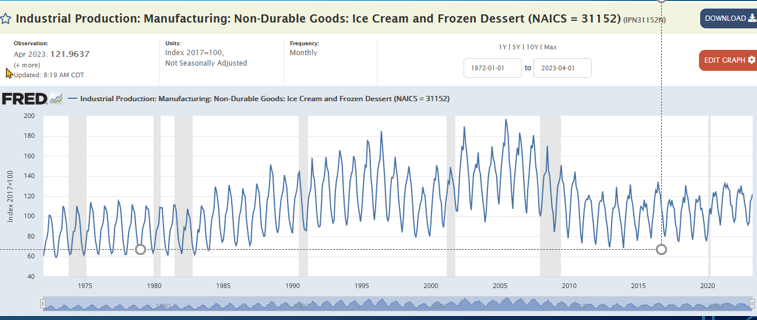

In [76]:
df.head()

,IPN31152N
DATE,
1972-01-01,60.1529
1972-02-01,67.2738
1972-03-01,74.4713
1972-04-01,78.3607
1972-05-01,85.0335


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 615 entries, 1972-01-01 to 2023-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  615 non-null    float64
dtypes: float64(1)
memory usage: 9.6 KB


In [138]:
df.describe()

,Produktion
count,615.000000
mean,110.230356
std,27.354022
min,58.846500
25%,90.039000
50%,108.022000
75%,127.639200
max,196.820600


In [78]:
df.columns = ["Produktion"]

In [79]:
df.head()

,Produktion
DATE,
1972-01-01,60.1529
1972-02-01,67.2738
1972-03-01,74.4713
1972-04-01,78.3607
1972-05-01,85.0335


<AxesSubplot:xlabel='DATE'>

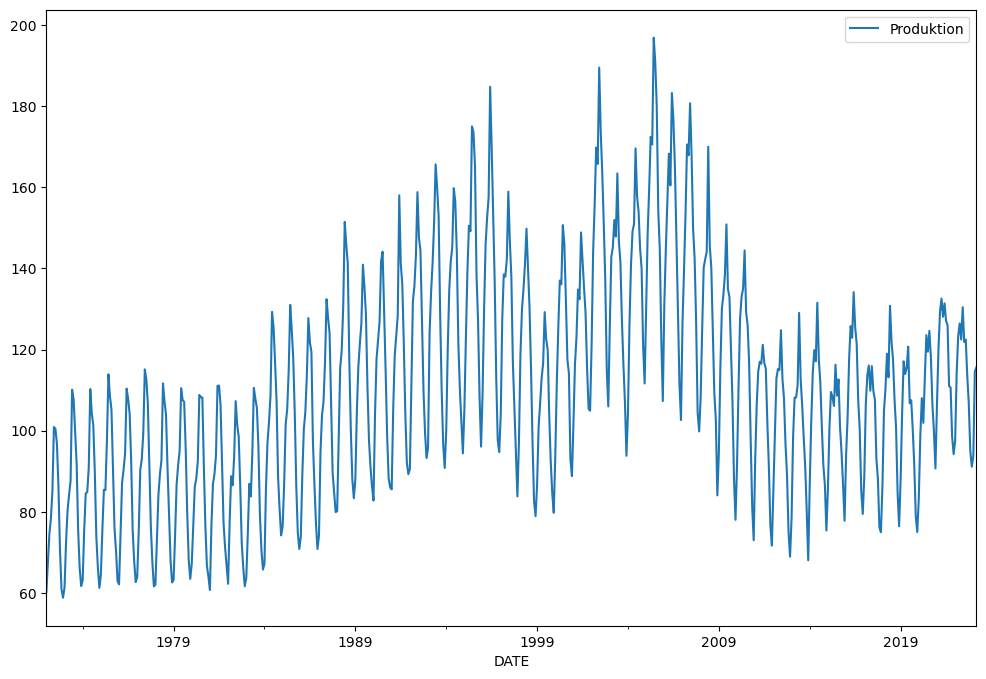

In [80]:
df.plot(figsize=(12,8))

Auffällig ist die saisonale Abhängigkeit. Viel im Sommer und wenig im Winter

### Teilen von Training und Testdaten

In [81]:
len(df)

615

In [82]:
test_size = 24                     # 24 Monate
test_ind = len(df)- test_size      # Länge - 24 Monate     

In [83]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [84]:
len(test)

24

<AxesSubplot:xlabel='DATE'>

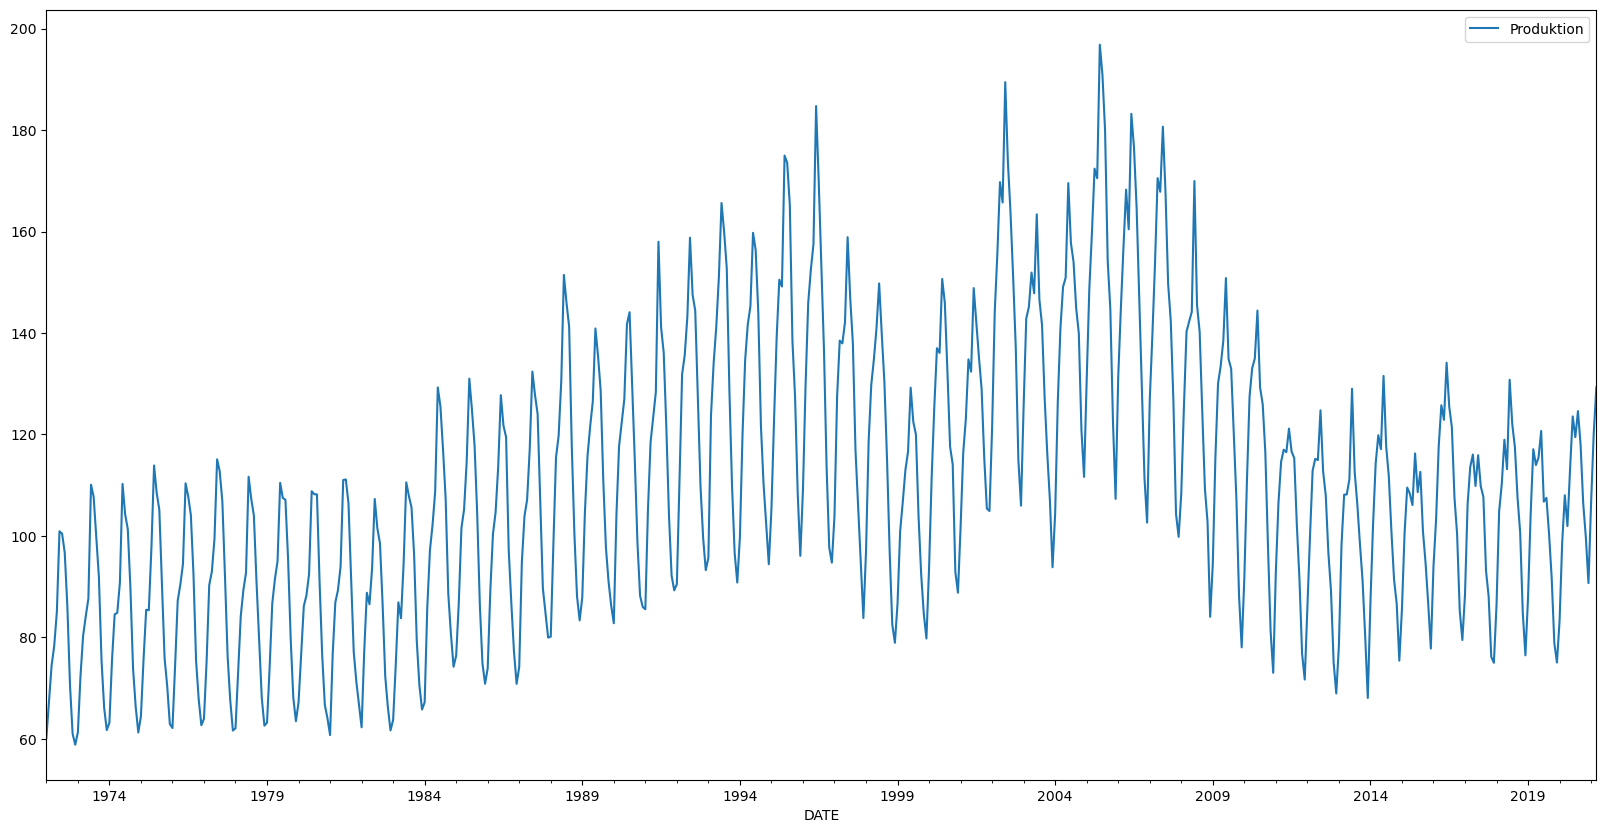

In [85]:
train.plot(figsize=(20,10))

<AxesSubplot:xlabel='DATE'>

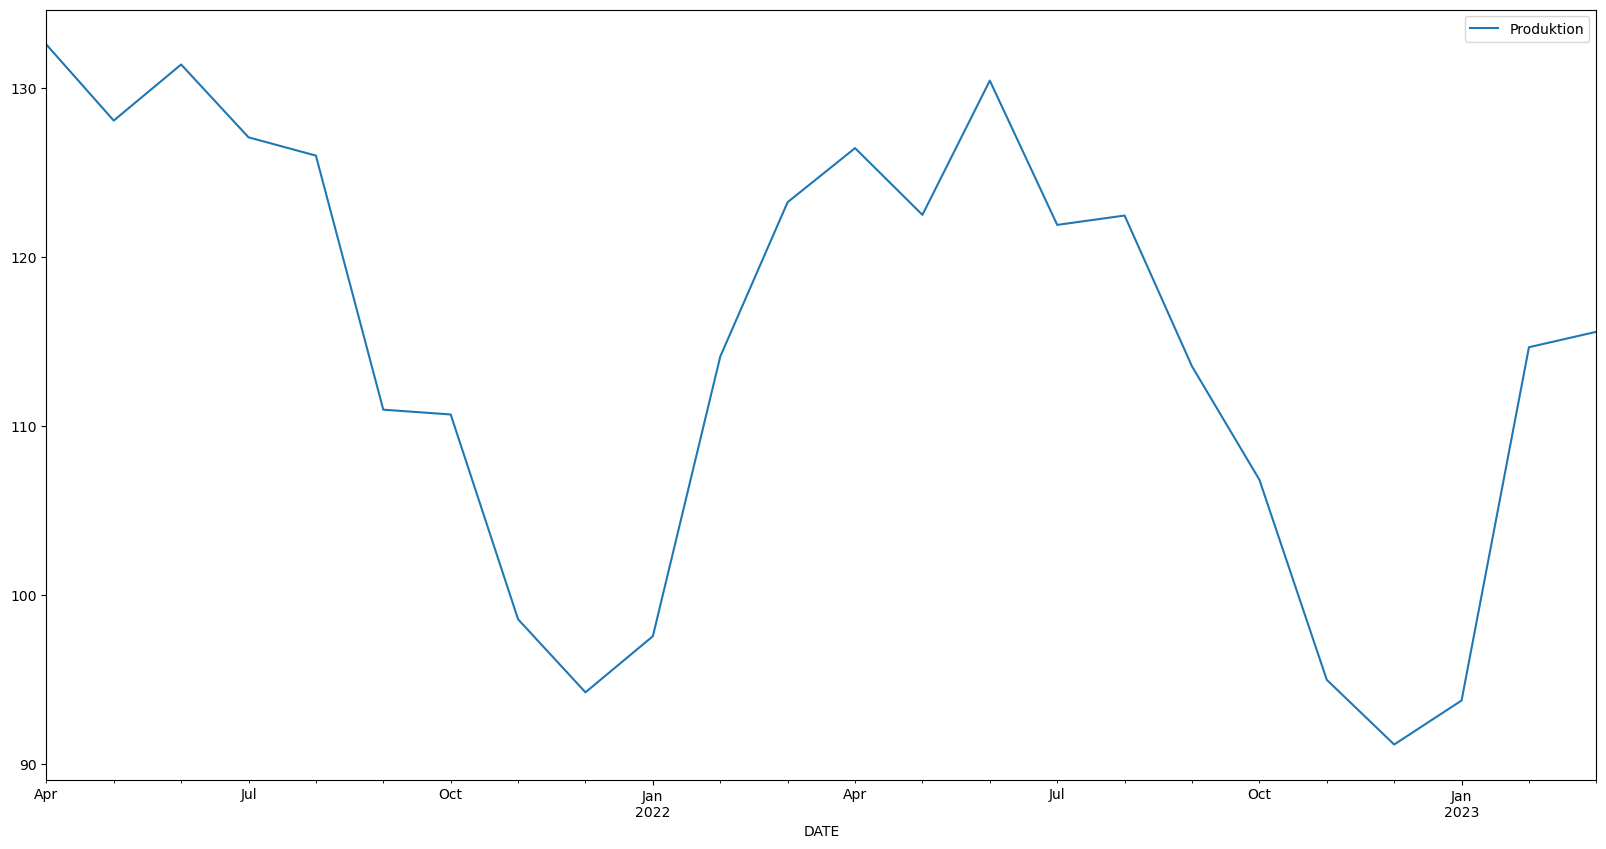

In [86]:
test.plot(figsize=(20,10))

### Skalieren der Daten mit MinMaxScaler

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [89]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [90]:
scaled_train.shape

(591, 1)

In [91]:
scaled_test.shape

(24, 1)

### Verwendung des TimeSeriesGenerator für Trainingsdaten - Batchdaten

In [92]:
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator

In [93]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [94]:
length = 18  # Anzahl der Punkte (Monate) die eingelesen wird, Länge der Outputsequence in Anzahl von Zeitschritten (Monaten) --> kleiner als Testdaten
n_features=1 # nur ein Merkmal
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)
# batch_size = 1 --> 1 Vorhersage

In [95]:
len(scaled_train)

591

In [96]:
len(generator) # um lenght kürzer als len(scaled_train)

573

In [97]:
# Wie sieht die erste Batch aus?
X,y = generator[0]

In [98]:
print(f'Given the Array: \n{X.flatten()}') # Länge die wir eigeben als Basis für Vorhersage
print(f'Predict this y: \n {y}')           # Testwert den wir vorhersagen --> batch_size

Given the Array: 
[0.00946844 0.06107885 0.11324444 0.14143379 0.18979649 0.30491157
 0.30149644 0.27411739 0.19733776 0.08531384 0.0156138  0.
 0.01773956 0.09849312 0.15587563 0.18355909 0.20875512 0.37144363]
Predict this y: 
 [[0.35419836]]


### Modell RNN / LSTM

In [99]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(length, n_features)))

model.add(keras.layers.Dense(10, activation='relu'))

model.add(keras.layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='mse')

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41,821
Trainable params: 41,821
Non-trainable params: 0
_________________________________________________________________


### Batchdaten mit TimeSeriesGenerator für Test/Validierung erzeugen

In [101]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1) # Generator zieht automatisch Index und Spalte

### Overfitting mit Early Stopping verhindern

In [102]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

### Fit Modell

In [103]:
model.fit(generator,epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
573/573 [==============================] - 8s 10ms/step - loss: 0.0234 - val_loss: 0.0055
Epoch 2/30
573/573 [==============================] - 5s 9ms/step - loss: 0.0074 - val_loss: 0.0014
Epoch 3/30
573/573 [==============================] - 5s 9ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 4/30
573/573 [==============================] - 4s 8ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 5/30
573/573 [==============================] - 4s 7ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 6/30
573/573 [==============================] - 5s 8ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 7/30
573/573 [==============================] - 4s 7ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 8/30
573/573 [==============================] - 4s 7ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 9/30
573/573 [==============================] - 4s 8ms/step - loss: 0.0026 - val_loss: 0.0085
Epoch 10/30
573/573 [==============================] - 5s 8ms/step - loss: 0.0026 - val_loss: 0.001

### Entwicklung vom Loss im Training

<AxesSubplot:>

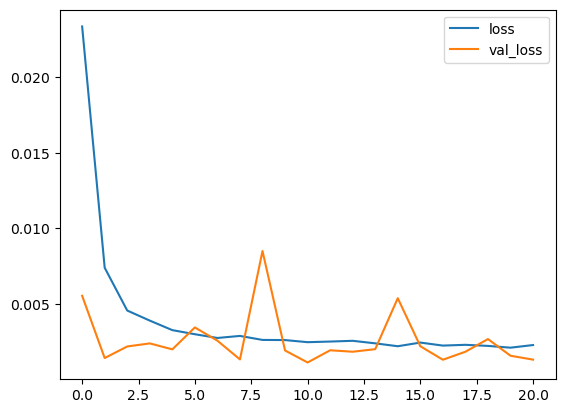

In [104]:
loss = pd.DataFrame(model.history.history)
loss.plot()

### Vorhersage mit erster Batch

In [105]:
fist_eval_batch = scaled_train[-length:]

In [106]:
len(scaled_train)

591

In [107]:
fist_eval_batch

array([[0.2382034 ],
       [0.14550484],
       [0.11741986],
       [0.17694408],
       [0.28878536],
       [0.35641109],
       [0.31227238],
       [0.39429574],
       [0.46898947],
       [0.43938391],
       [0.47658075],
       [0.42874641],
       [0.34471035],
       [0.29659262],
       [0.23086797],
       [0.34511622],
       [0.44446965],
       [0.51066033]])

In [108]:
eval_batch = fist_eval_batch.reshape(1,length,n_features)

In [109]:
eval_batch

array([[[0.2382034 ],
        [0.14550484],
        [0.11741986],
        [0.17694408],
        [0.28878536],
        [0.35641109],
        [0.31227238],
        [0.39429574],
        [0.46898947],
        [0.43938391],
        [0.47658075],
        [0.42874641],
        [0.34471035],
        [0.29659262],
        [0.23086797],
        [0.34511622],
        [0.44446965],
        [0.51066033]]])

In [110]:
model.predict(eval_batch)[0] # Vorhersage

1/1 [==============================] - 0s 217ms/step


array([0.5755034], dtype=float32)

In [111]:
scaled_test[0] # Realer Wert

array([0.5342394])

### Evaluation mit Testdaten
Vorhersage der Testdaten der letzten 12 Monaten des gesamten Datensatzes.

In [112]:
test_predictions = []

first_eval_batch = scaled_train[-length:] # Erste X-Werte, letzten Werte der Trainingsdaten (-length)
current_batch = first_eval_batch.reshape((1, length, n_features)) # Aktuelle Batch, 1 neue Dimension dazu
for i in range(len(test)): # Iteration über Länge Testdaten
    
    # Vorhersage für den nächsten Zeitpunkt (Monat)
    current_pred = model.predict(current_batch)[0] # Starten mit Trainigsdaten
    
    # Vorhersage speichern
    test_predictions.append(current_pred) 
    
    # update batch um die Vorhersage einzufügen und den ersten Wert (ältester löschen)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) # 1 Wert oben wegnehmen, Prediction am Ende hinzufügen

1/1 [==============================] - 0s 26ms/step


In [113]:
current_batch

array([[[0.37561575],
        [0.29591051],
        [0.26941553],
        [0.39290932],
        [0.50508964],
        [0.57263994],
        [0.62857598],
        [0.67686766],
        [0.70371026],
        [0.67175406],
        [0.58730614],
        [0.46973073],
        [0.35682032],
        [0.27481449],
        [0.24850006],
        [0.3664307 ],
        [0.4869177 ],
        [0.54947549]]])

In [114]:
test_predictions

[array([0.5755034], dtype=float32),
 array([0.6322857], dtype=float32),
 array([0.6668858], dtype=float32),
 array([0.6501196], dtype=float32),
 array([0.58227044], dtype=float32),
 array([0.48332775], dtype=float32),
 array([0.37561575], dtype=float32),
 array([0.2959105], dtype=float32),
 array([0.26941553], dtype=float32),
 array([0.39290932], dtype=float32),
 array([0.50508964], dtype=float32),
 array([0.57263994], dtype=float32),
 array([0.628576], dtype=float32),
 array([0.67686766], dtype=float32),
 array([0.70371026], dtype=float32),
 array([0.67175406], dtype=float32),
 array([0.58730614], dtype=float32),
 array([0.46973073], dtype=float32),
 array([0.35682032], dtype=float32),
 array([0.2748145], dtype=float32),
 array([0.24850006], dtype=float32),
 array([0.3664307], dtype=float32),
 array([0.4869177], dtype=float32),
 array([0.5494755], dtype=float32)]

In [115]:
true_predictions = scaler.inverse_transform(test_predictions) # Rückumwandlung Entnormalisierung

In [116]:
test['Vorhersage'] = true_predictions

C:\Users\Gero\AppData\Local\Temp\ipykernel_27140\1260751441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Vorhersage'] = true_predictions


In [117]:
test

,Produktion,Vorhersage
DATE,,
2021-04-01,132.5577,138.251065
2021-05-01,128.0570,146.085552
2021-06-01,131.3761,150.859467
2021-07-01,127.0658,148.546167
2021-08-01,125.9840,139.184740
2021-09-01,110.9484,125.533211
2021-10-01,110.6657,110.671744
2021-11-01,98.5450,99.674486
2021-12-01,94.2224,96.018865


### Vergleich Produktion versus Vorhersage

<AxesSubplot:xlabel='DATE'>

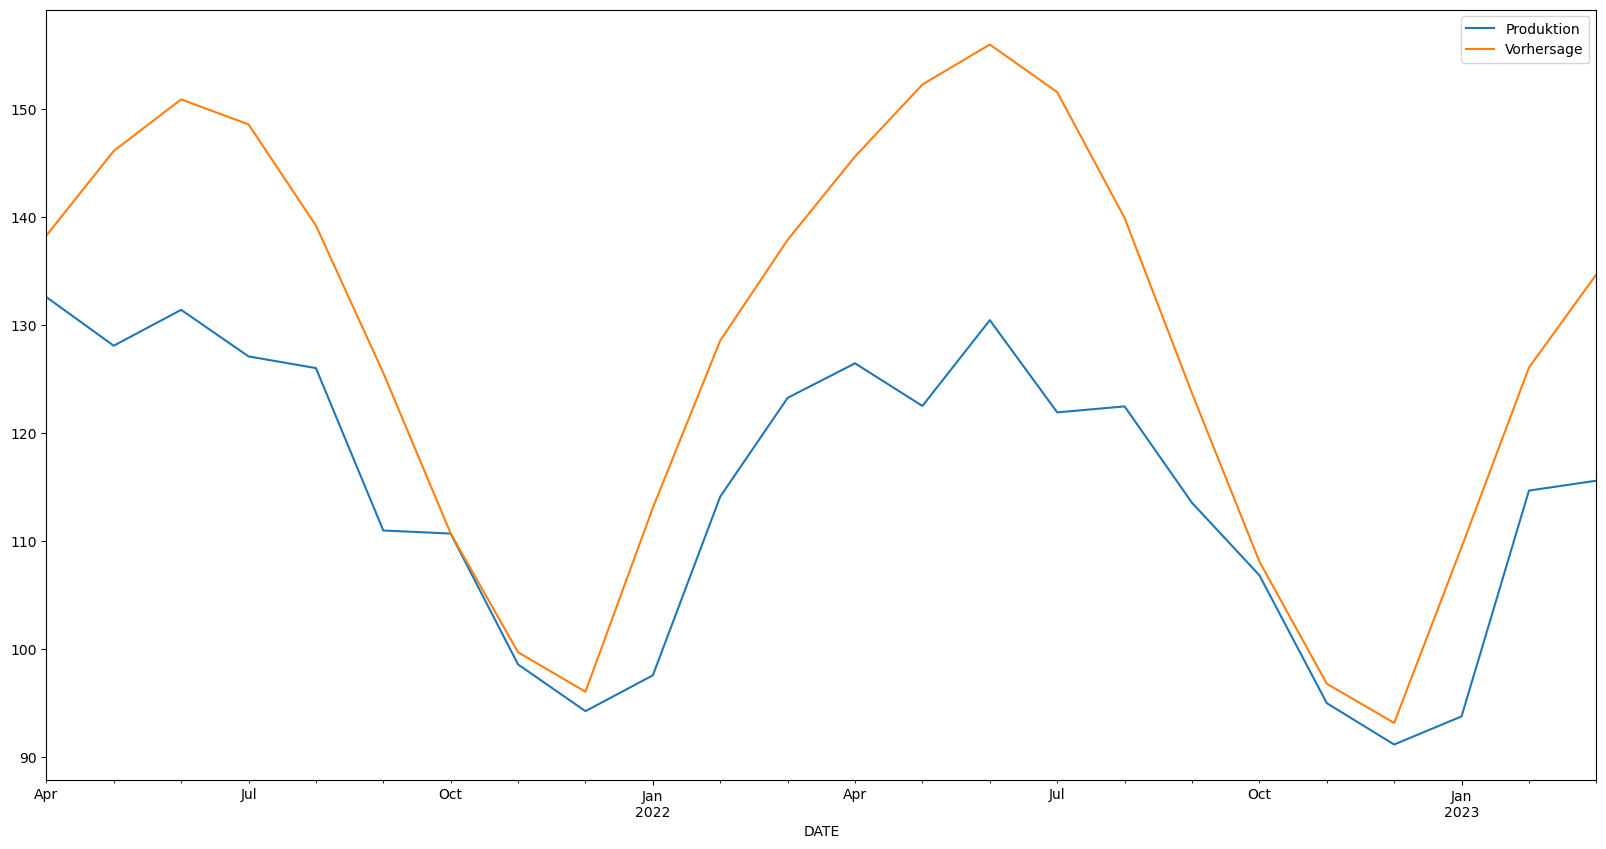

In [118]:
test.plot(figsize=(20,10))

### Mean Square Error

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
np.sqrt(mean_squared_error(test['Produktion'],test['Vorhersage']))

16.06144998529005

### R2 Score

In [121]:
from sklearn.metrics import r2_score
r2_score(test['Produktion'], test['Vorhersage'])

-0.4960588724875987

###  Vorhersage in die Zukunft

In [122]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [123]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [124]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit(generator,epochs=8)

Epoch 1/8
603/603 [==============================] - 5s 6ms/step - loss: 0.0192
Epoch 2/8
603/603 [==============================] - 3s 6ms/step - loss: 0.0077
Epoch 3/8
603/603 [==============================] - 4s 6ms/step - loss: 0.0055
Epoch 4/8
603/603 [==============================] - 4s 6ms/step - loss: 0.0043
Epoch 5/8
603/603 [==============================] - 3s 5ms/step - loss: 0.0043
Epoch 6/8
603/603 [==============================] - 3s 5ms/step - loss: 0.0041
Epoch 7/8
603/603 [==============================] - 3s 6ms/step - loss: 0.0034
Epoch 8/8
603/603 [==============================] - 4s 6ms/step - loss: 0.0037


In [125]:
forecast = []

periods = 12 # Angabe der Perioden (Monate) des Forecast

first_eval_batch = scaled_full_data[-length:] # Erste X-Werte, letzten Werte der Trainingsdaten (-length)
current_batch = first_eval_batch.reshape((1, length, n_features)) # Aktuelle Batch, 1 neue Dimension Univariate Zeitreihe

for i in range(periods):
    
  # Vorhersage für den nächsten Zeitpunkt (Monat)
    current_pred = model.predict(current_batch)[0]
    
    # Vorhersage speichern
    forecast.append(current_pred) 
    
    # update batch um die Vorhersage einzufügen und den ersten Wert (ältester löschen)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 40ms/step


In [126]:
forecast = scaler.inverse_transform(forecast)

In [127]:
forecast

array([[122.25894015],
       [126.0870245 ],
       [126.97486411],
       [124.84598495],
       [120.0446805 ],
       [112.22682998],
       [102.99720359],
       [ 93.69651861],
       [ 90.84138709],
       [ 95.60867751],
       [104.33869804],
       [112.25759558]])

###  Neue Timestamp indizes mit Pandas erzeugen.

In [128]:
df

,Produktion
DATE,
1972-01-01,60.1529
1972-02-01,67.2738
1972-03-01,74.4713
1972-04-01,78.3607
1972-05-01,85.0335
...,...
2022-11-01,94.9638
2022-12-01,91.1341
2023-01-01,93.7389


In [129]:
forecast_index = pd.date_range(start='2023-04-01',periods=periods,freq='MS')

In [130]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [131]:
forecast_df

,Forecast
2023-04-01,122.258940
2023-05-01,126.087024
2023-06-01,126.974864
2023-07-01,124.845985
2023-08-01,120.044680
2023-09-01,112.226830
2023-10-01,102.997204
2023-11-01,93.696519
2023-12-01,90.841387
2024-01-01,95.608678


In [132]:
df.columns

Index(['Produktion'], dtype='object')

<AxesSubplot:>

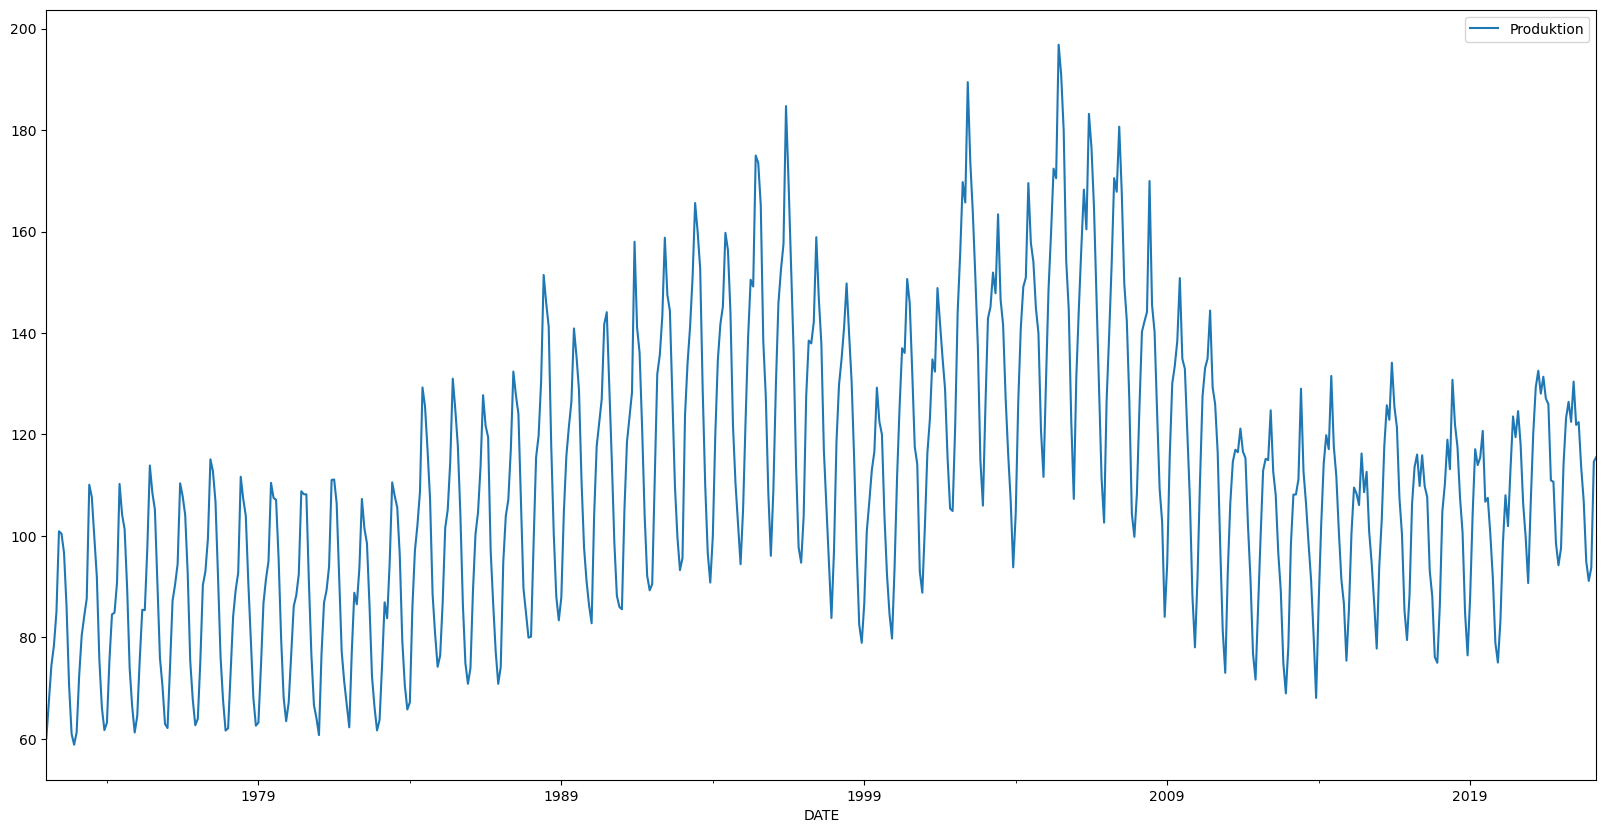

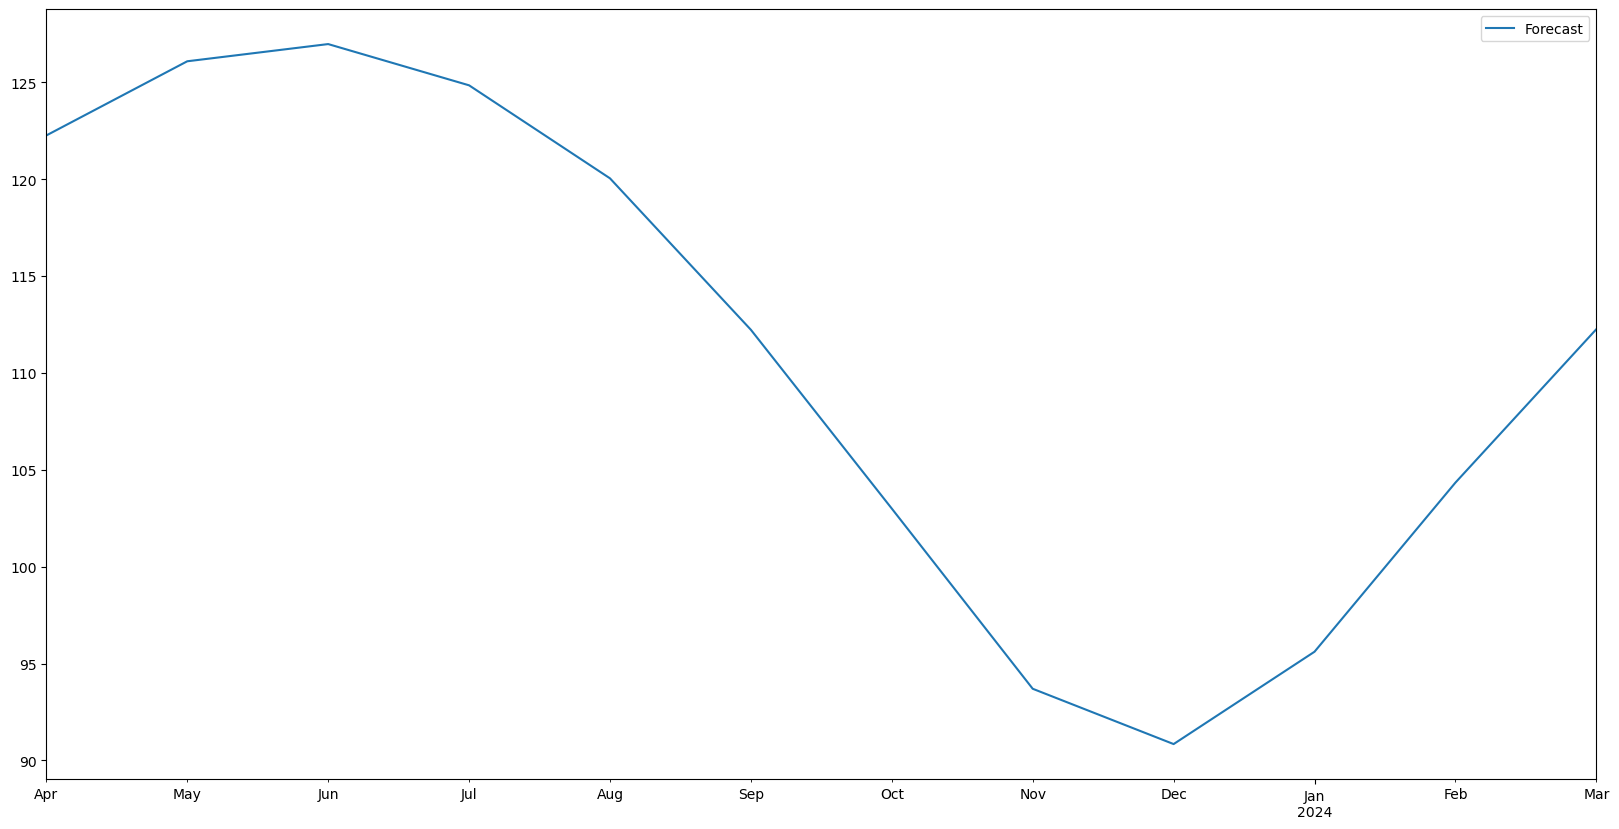

In [133]:
df.plot(figsize=(20,10))
forecast_df.plot(figsize=(20,10))

### Plots vereinigen

In [134]:
#https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

Text(0.5, 1.0, 'Prediction')

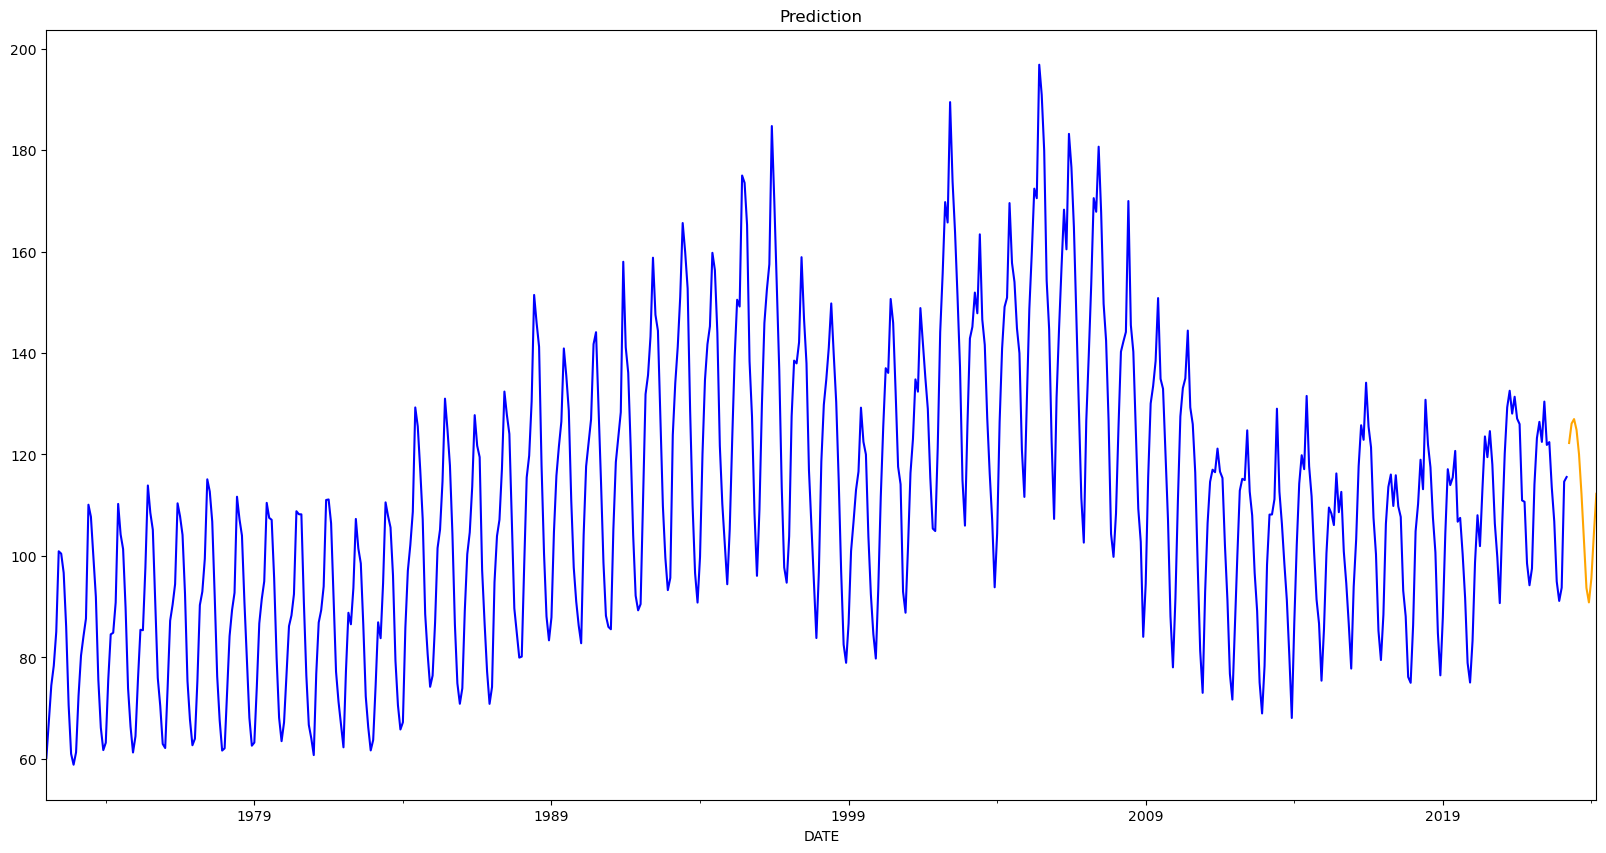

In [135]:
plt.figure(figsize=(20, 10))
df['Produktion'].plot(label='Produktion', color='blue')
forecast_df['Forecast'].plot(label='Forcast', color='orange')
           
plt.title('Prediction')

(600.0, 650.0)

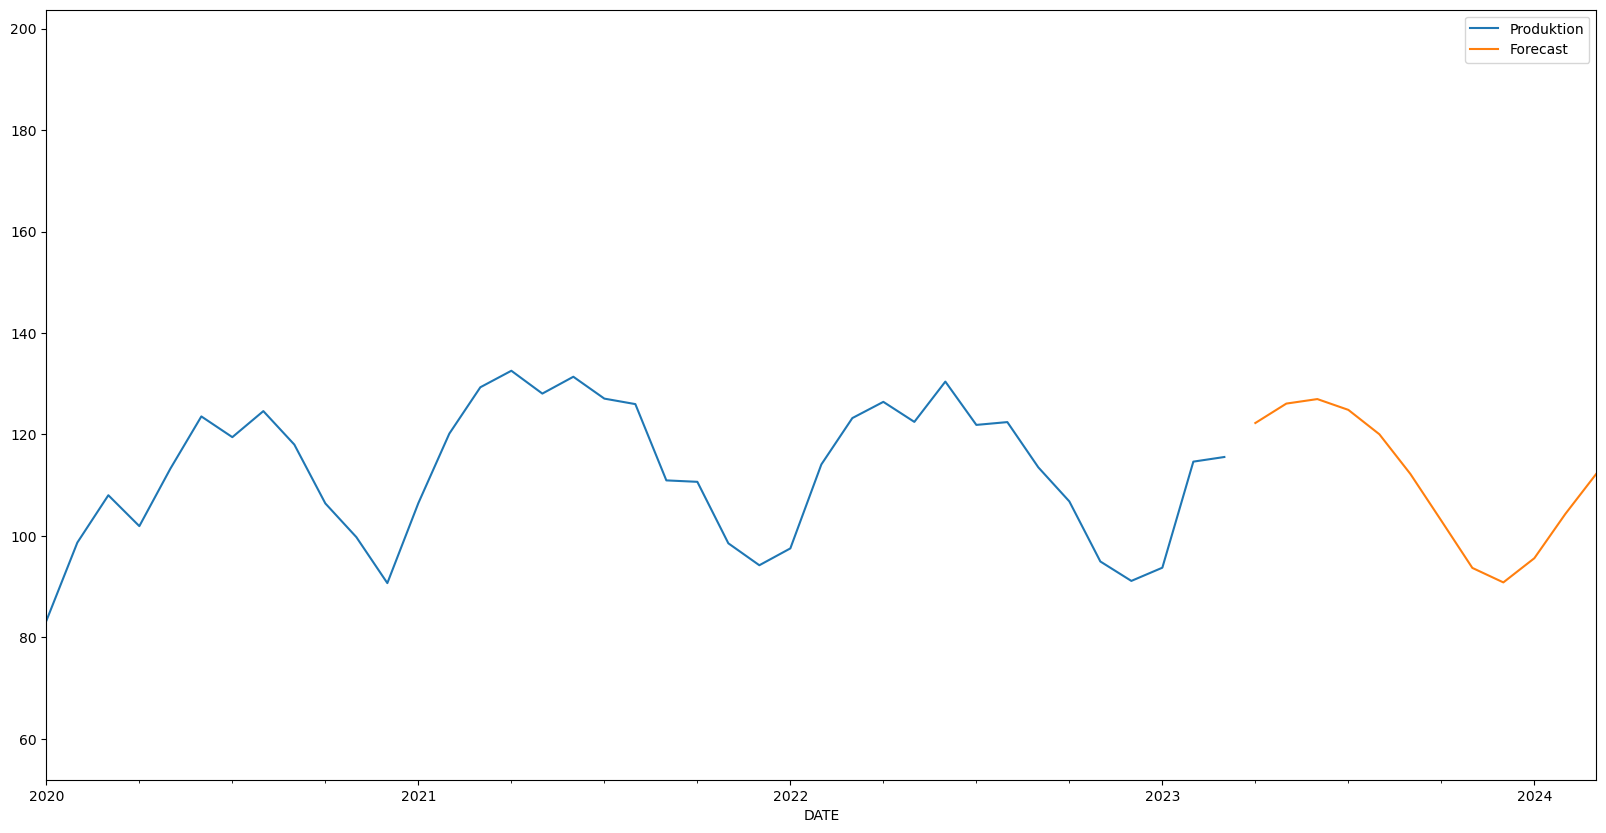

In [136]:
ax = df.plot(figsize=(20,10))
forecast_df.plot(ax=ax)
plt.xlim('2020-01-01','2024-03-01')